<a href="https://colab.research.google.com/github/sarthakakre27/Face-Recognition-CNN-Attendance-System/blob/main/Automated_Attendance_System_HybridModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NFT Project** on **Automated Attendance System** using **CNN** Models
<br>
<h4>Made under the guidance of - </h4>
<h3>Dr. Poonam Sharma </h3>
<h3>Santosh Sahu Sir </h3>
<br>

<h4>Submitted By - Group 17</h4>
<h3>Sarthak Akre (BT19CSE099) , Gourav Chayande (BT19CSE021) , Nilesh Palandurkar (BT19CSE074)</h3>



# Implementation of face recognition using neural net 

In this project an Automated Attendance Marking System is to be designed using Face detection and Recognition technology. Taking attendance in a large class is cumbersome, repetitive, and it consumes valuable class time. To avoid these problems, we are tasked with developing an automatic attendance system using deep learning framework. An automatic attendance system based on the image processing consists of two steps: face detection and face recognition.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
#we are importing important libraries such as cv,numpy,os,sklearn etc
#cv for face detection and preprocessing
import cv2
#numpy for data managing using arrays
import numpy as np
#os to input data locally
import os
#sk image for reading images into format suitable for training 
from skimage import io
#to make training and testing data from overall pool of data
from sklearn.model_selection import train_test_split
#to plot graphs
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Listing the path of all the images

Now that each image path has been loaded we can start working on the images themselves.

To make the images readable and have the data as clean as possible we will have to do preprocessing.

But first lets have the labels for the corresponing data.

In [ ]:
#make an array for all the files 
PathForDatasetArr = []
dir_path = "/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/gt_db" #change for your path of the directory of the dataset

#using the os library add all the paths of the files in the specified directory to our array
for i in os.listdir(dir_path):
    for j in os.listdir(os.path.join(dir_path, i)):
        PathForDatasetArr.append(os.path.join(dir_path,os.path.join(i, j)))

## Reading each image and assigning respective labels

In [ ]:
#an array for storing all the images themselves from the path 
Arr_ImageMatrices = []

#an array for storing all the corresponding labels to said images
Arr_ImageLabels = []

In [ ]:
it = 0
for i in PathForDatasetArr:
    temp_ImgRead = io.imread(i,plugin="pil")#all the images are grey but still to be safer as_grey is used with python imaging library plugin
    #we use imread to read the image file and store image data(Matrix) in the array
    #for this dataset we are converting all images to single grayscale channel
    Arr_ImageMatrices.append(temp_ImgRead)
    #as all the backgrounds are same for all the images --> then we increase the 3rd dimension with the help of no. of filters
    
    #the processing of data was simple in our case as the dataset had convient naming convention
    #we just split the path and made the subject value decremented by 1 (array index) as our class name or label
    temp_LabelRead = int(os.path.split(PathForDatasetArr[it])[0].split("s")[-1]) - 1
    Arr_ImageLabels.append(temp_LabelRead)
    it=it+1

###About the dataset:
We are using Georgia Tech Face Database.

<div>
<img src="https://www.researchgate.net/profile/Tarun-Gupta-23/publication/342872018/figure/fig2/AS:961257142239233@1606192970283/Sample-Images-from-Georgia-Tech-Face-Database-GTFD-16.ppm" width="600"/>
</div>


Georgia Tech face database contains images of 50 people taken in two or three sessions between 06/01/99 and 11/15/99 at the Center for Signal and Image Processing at Georgia Institute of Technology.

All people in the database are represented by 15 color JPEG images with cluttered background taken at resolution 640x480 pixels. The average size of the faces in these images is 150x150 pixels. The pictures show frontal and/or tilted faces with different facial expressions, lighting conditions and scale. Each image is manually labeled to determine the position of the face in the image. The images are stored in 50 directories s1, ..., s50. In each directory there are 15 images 01.jpg, ..., 15.jpg corresponding to one person in the database. 

Each image is manually labeled to determine the position of the face in the image.
The label files contain four integers that describe the coordinates of the face rectangles 
and a string (s1, ..., s50) indicating the identity of the face.

####Details of above:

Color Images:	Yes	
Image Size:	150x150	
Number of unique people:	50	
Number of pictures per person:	15
Different Conditions:	frontal and/or tilted faces with different facial expressions, lighting conditions and scale
Citation reference:	Ara V. Nefian and Monson H. Hayes, “Maximum likelihood training of the embedded HMM for face detection and recognition”, IEEE International Conference on Image Processing 2000.

For more information click [here.](http://www.anefian.com/research/face_reco.htm)

##Preprocessing: Face Detection using OpenCV and cropping the image to a size of 150 X 150

Now that we have our images and labels assigned correctly we need to "clean up" or pre process the images so that model is trained correctly.

For this purpose we are using openCV. OpenCV has a lot of useful features related to object detection, face detection etc.

<div>
<img src="https://miro.medium.com/max/1156/1*XX8WqHo0lyrgZfTTRQ3ESQ.jpeg" width="400"/>
</div>

We will use a face detection classifier called as Haarcascade.
Haar cascades, first introduced by Viola and Jones in their seminal 2001 publication, Rapid Object Detection using a Boosted Cascade of Simple Features, are arguably OpenCV’s most popular object detection algorithm.



Some Haar cascade benefits are that they’re very fast at computing features, they can detect faces in images regardless of the location or scale of the face and are capable of running in real-time.

<div>
<img src="https://929687.smushcdn.com/2407837/wp-content/uploads/2014/10/sliding_window_example.gif?size=323x475&lossy=1&strip=1&webp=0" height="350"/>
</div>



Something to be noted here is that we are using haarcascade front face classifier but from above details about the dataset we can see that there are "frontal and/or tilted faces with different facial expressions", so the data in this case will be noisier and may lead to lesser accuracy overall.

Also there is a lot more variation in the images in terms of ethnicity of people and even the images of people themselves as the facial features have change over the 2 year span that this was recorded.

Detecting all the tilted etc images and applying the filter to those would have been bulkier operation so we chose to work with a noisier dataset instead.

In [ ]:
faceDetectClassifier = cv2.CascadeClassifier("/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/haarcascade_frontalface_default.xml")

In [ ]:
it = 0
#we will store the filtered images in a new array
Arr_ImageMatricesFin = []
for i in Arr_ImageMatrices:
    #we are just applying the filter to all the images and storing the output
    detectedFacePoints = faceDetectClassifier.detectMultiScale(i) #returns array of the face detection guesses
    if len(detectedFacePoints) == 0: #haarcascade faults
        x,y = 200,100 #most general face point
        print(str(it) + " -----error----- ")
    else:
        x,y = detectedFacePoints[0][:2] #extracting the top left point for the detected face
    #the images are not of desired shape so we crop into the detected face to change the size to 150x150
    croppedImg = i[y: y + 150, x: x + 150] #cropping 150px in x and y direction(left and down direction)
    Arr_ImageMatricesFin.append(croppedImg)
    it = it + 1

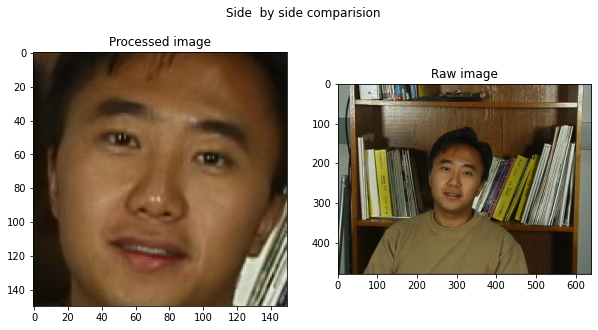

In [ ]:
#to make plots appear inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
#a side by side comparision:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Side  by side comparision')

fig.add_subplot(1, 2, 1)
plt.title("Processed image")
plt.imshow(Arr_ImageMatricesFin[54])

fig.add_subplot(1, 2, 2)
plt.title("Raw image")
plt.imshow(Arr_ImageMatrices[54])

In [ ]:
print(len(Arr_ImageLabels))
print(len(Arr_ImageMatrices))
print(len(Arr_ImageMatricesFin))

750
750
750


#Using Convolutional Neural Network(CNN) to classify faces of subjects(students in our case - label)


## Splitting Dataset into train and test

<div>
<h2></h2>
<img src="https://d33wubrfki0l68.cloudfront.net/c39b2d19183ed14141a8b7b03943442d40efee0d/81e2a/wp-content/uploads/2019/03/train_test_split.png" width="450"/>
</div>

For making the model we need to have 2 sets on data one for training and other for testing.

The data in these also needs to be randomly selected so as to avoid overtraining.

To split the testing and training data we use sklearn model_selection and it will give us the split we want for both the labels and images without losing the overall connection between them.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Arr_ImageMatricesFin),np.array(Arr_ImageLabels), train_size=0.75, random_state = 42)

In [ ]:
#checking the dimensions after the train-test split
X_train = np.array(X_train)
X_test = np.array(X_test)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
#600 images for training and 150 images for testing

X_train shape: (562, 150, 150, 3)
X_test shape: (188, 150, 150, 3)


In [ ]:
#number of classes is 50
total_classes = 50
y_train = np.array(y_train) 
y_test = np.array(y_test)
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (562,)
y_test shape: (188,)


In [ ]:
#As we are using keras to help train our model we have to import those libraries as well
import keras
from keras.models import Sequential, load_model #sequential layers in CNN, load the computed model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation #layers, functions, utilities for each layer
#from keras.models import Sequential
from tensorflow.keras.optimizers import Adam #optimizer for the network
from keras.callbacks import TensorBoard
from keras.utils import np_utils #convert to one-hot-vector
#from keras.layers import Dense, Dropout, Activation
#from PIL import Image


<div>
<img src="https://www.andreaperlato.com/img/onehot%20encode.png" width="600"/>
</div>

In [ ]:
#np_utils.to_categorical is used to convert array of labeled data(from 0 to total_classes - 1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, total_classes)
Y_test = np_utils.to_categorical(y_test, total_classes)
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
#split for each class corresponding to each vector
print(f'one hot vector - {Y_train[0]}')

Y_train shape: (562, 50)
Y_test shape: (188, 50)
one hot vector - [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


#Making the models


For this assignment we were tasked to combine multiple models into one to increase the robustness of the predictions and increase the verstility of the project.


So we chose a few different models to accomplish the task, below we will go over them one by one.

In [ ]:
import keras,os
from keras.models import Sequential
from keras.models import Model
from keras.layers import Lambda, Activation, Input, Conv2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.layers import Concatenate
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
from keras.layers import *

##VGG16 (Visual Geometry Group)

The VGG16 Architecture was developed and introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford, in the year 2014, through their article “Very Deep Convolutional Networks for Large-Scale Image Recognition.”


<div>
<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="650"/>
</div>




Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture.

<div>
<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png" width="700"/>
</div>


In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

The VGG16 model achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous models submitted to ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in the year 2014. It made improvements over AlexNet architecture by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple three × three kernel-sized filters one after another. VGG16 was trained for weeks using NVIDIA Titan Black GPUs.
VGG16 is used in many deep learning image classification techniques and is popular due to its ease of implementation. VGG16 is extensively used in learning applications due to the advantage that it has.

The two major drawbacks with VGG Net are:

1.   It is very slow to train.
2.   The weights of the network architecture are quite large themselves (a concern for disk and bandwidth)

In spite of these, the following advantages outweigh the drawbacks.

1.   It is easy to implement and is a great building block for learning purposes.
2.   VGG16 can be pre-trained on ImageNet.

VGG16 can be used for transfer learning as we have done below.

In [ ]:
from keras.applications import vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16_model_out = vgg16_model.output
vgg16_model_flatten = Flatten()(vgg16_model_out)
vgg16_model_dense1 = Dense(512, activation='relu')(vgg16_model_flatten)
vgg16_model = Model(vgg16_model.input,vgg16_model_dense1)
for layer in vgg16_model.layers:
    layer._name = layer.name + str('_C')
print(vgg16_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1_C (InputLayer)       [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1_C (Conv2D)      (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2_C (Conv2D)      (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool_C (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1_C (Conv2D)      (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2_C (Conv2D)      (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool_C (MaxPooling2D) (None, 37, 37, 128)       0     

##VGG19 (Visual Geometry Group)


VGG19 is a variant of the VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs.
<div>
<img src="https://miro.medium.com/max/875/1*Q_bg1E3trWcjdk9_jnVGwg.png" width="700"/>
</div>
VGG-19 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 19 layers deep and can classify images into 1000 object categories, such as a keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.


In [ ]:
from keras.applications import vgg19

In [ ]:
vgg19_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(150,150,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19_model_out = vgg19_model.output
vgg19_model_flatten = Flatten()(vgg19_model_out)
vgg19_model_dense1 = Dense(512, activation='relu')(vgg19_model_flatten)
vgg19_model = Model(vgg19_model.input,vgg19_model_dense1)
print(vgg19_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

###VGGFace

<!-- ![pic to edit](https://qphs.fs.quoracdn.net/main-qimg-935f98c5a89271addd3c467b0c2f4311) -->

<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2019/04/vgg-face-architecture.jpg?w=1805&ssl=1" width="900"/>

Here we are using a specialized pre trained model called VGGFace for classification of faces.

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford. ([link](http://www.robots.ox.ac.uk/~vgg/))



<img src="https://i2.wp.com/sefiks.com/wp-content/uploads/2018/08/vgg-face-model.png?w=1080&ssl=1" width="1000"/>

The VGGFace model, named later, was described by Omkar Parkhi in the 2015 paper titled “Deep Face Recognition.”

A contribution of the paper was a description of how to develop a very large training dataset, required to train modern-convolutional-neural-network-based face recognition systems, to compete with the large datasets used to train models at Facebook and Google.
This dataset is then used as the basis for developing deep CNNs for face recognition tasks such as face identification and verification. Specifically, models are trained on the very large dataset, then evaluated on benchmark face recognition datasets, demonstrating that the model is effective at generating generalized features from faces.

They describe the process of training a face classifier first that uses a softmax activation function in the output layer to classify faces as people. This layer is then removed so that the output of the network is a vector feature representation of the face, called a face embedding. The model is then further trained, via fine-tuning, in order that the Euclidean distance between vectors generated for the same identity are made smaller and the vectors generated for different identities is made larger. This is achieved using a triplet loss function.

A deep convolutional neural network architecture is used in the VGG style, with blocks of convolutional layers with small kernels and ReLU activations followed by max pooling layers, and the use of fully connected layers in the classifier end of the network.

The authors of VGGFace provide the source code for their models, as well as pre-trained models that can be downloaded with standard deep learning frameworks such as Caffe and PyTorch, although there are not examples for TensorFlow or Keras.

We could convert the provided models to TensorFlow or Keras format and develop a model definition in order to load and use these pre-trained models. This work has already been done and can be used directly by third-party projects and libraries.

The library for using the VGGFace models in Keras is the keras-vggface project and library by Refik Can Malli.

Given that this is a third-party open-source project and subject to change, we have created a fork of the project here.

In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-m_wj_fxg
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-m_wj_fxg
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=cb7699d9633b4261a88b78ed449b6967dfdeb5af77c3743dd4bef301b9bf9ccf
  Stored in directory: /tmp/pip-ephem-wheel-cache-79bhwu78/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
     |████████████████████████████████| 50 kB 2.9 MB/s 


A VGGFace model can be created using the VGGFace() constructor and specifying the type of model to create via the ‘model‘ argument. 

The keras-vggface library provides three pre-trained VGGModels, a VGGFace1 model via model=’vgg16′ (the default), and two VGGFace2 models ‘resnet50‘ and ‘senet50‘.

First, we can load the VGGFace model without the classifier by setting the ‘include_top‘ argument to ‘False‘, specifying the shape of the output via the ‘input_shape‘ and setting ‘pooling‘ to ‘avg‘ so that the filter maps at the output end of the model are reduced to a vector using global average pooling.

In [ ]:
nb_class = 50
hidden_dim = 512

vgg_notop = VGGFace(include_top=False, input_shape=(150, 150, 3))
for layer in vgg_notop.layers:
    layer.trainable = False

last_layer = vgg_notop.get_layer('pool5').output

x = Flatten(name='flatten')(last_layer)
x = Dense(512, activation='relu', name='fc6')(x)

custom_vgg_model = keras.Model(vgg_notop.input, x)
custom_vgg_model.summary()

58925056/58909280 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 150, 150, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 150, 150, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 75, 75, 128)       147584    
____________________________________________________________

###GoogLe Net

Google Net (or Inception V1) was proposed by research at Google (with the collaboration of various universities) in 2014 in the research paper titled “Going Deeper with Convolutions”.
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200429201549/Inceptionv1_architecture.png" width="1200"/>


The GoogLeNet architecture consists of 22 layers (27 layers including pooling layers), and part of these layers are a total of 9 inception modules(figure4).

One method the GoogLeNet achieves efficiency is through reduction of the input image, whilst simultaneously retaining important spatial information.
The first conv layer in figure 2 uses a filter(patch) size of 7x7, which is relatively large compared to other patch sizes within the network. This layer's primary purpose is to immediately reduce the input image, but not lose spatial information by utilising large filter sizes.

The second conv layer has a depth of two and leverages the 1x1 conv block, which as the effect of dimensionality reduction. Dimensionality reduction through 1x1 conv block allows the decrease of computational load by lessening the layers' number of operations.

**Inception Module:**<br>
The inception module is different from previous architectures such as AlexNet, ZF-Net. In this architecture, there is a fixed convolution size for each layer. 
In the Inception module 1×1, 3×3, 5×5 convolution and 3×3 max pooling performed in a parallel way at the input and the output of these are stacked together to generated final output. The idea behind that convolution filters of different sizes will handle objects at multiple scale better.

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

**Auxilary Classifiers** <br>
Inception architecture used some intermediate classifier branches in the middle of the architecture, these branches are used during training only.
One main problem of an extensive network is that they suffer from vanishing gradient descent.
Auxilary Classifiers are added to the intermediate layers of the architecture.
Auxilary Classifiers are only utilised during training and removed during inference. 
The loss of auxiliary classifiers is weighted, meaning the calculated loss is multiplied by 0.3.

GoogLe Net has multiple outputs but we are only using one of those outputs currently.

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (150, 150, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(512, activation = 'relu')(X1)
  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(512, activation = 'relu')(X2)  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(512, activation = 'relu')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
GNet_model = GoogLeNet()
for layer in vgg16_model.layers:
    layer._name = layer.name + str('_G')

In [ ]:
GNet_model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 72, 72, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 35, 35, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 35, 35, 64)   4160        max_pooling2d[0][0]              
__________________________________________________________________________________________

These were all the individual models, now we have to merge them to create a connected model.

Below are all the outputs of the above models and their shapes, notice that they are all of the same shape. This is intentionally done for the next step.

One of the main difference between Functional and Sequential API is that Sequential works with single input and single output where as Functional API works with single-input and single-output or single-input and multiple-output, or multiple-inputs and multiple-outputs. So using Functional API, you can add two layers of multiple-inputs through `keras.layers.Add().

In [ ]:
print(vgg16_model.output)
print(vgg19_model.output)
print(custom_vgg_model.output)
print(GNet_model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense_C_G'")
KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='fc6/Relu:0', description="created by layer 'fc6'")
[<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_4')>, <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_2')>, <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_3')>]



<img src="https://i.stack.imgur.com/FbaQG.png" width="700"/>

We will now use  the Add function from the API, this function adds a list of inputs. It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).

Using this we can merge the above 4 models into one.

In [ ]:
from keras.layers import *

mergedOut = Add()([custom_vgg_model.output,vgg16_model.output,vgg19_model.output,GNet_model.output[2]])

mergedOut = Dense(512, activation='relu')(mergedOut)
mergedOut = Dropout(.5)(mergedOut)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(.35)(mergedOut)

# output layer
mergedOut = Dense(50, activation='softmax')(mergedOut)
Hybrid_Model = Model([custom_vgg_model.input,vgg16_model.input,vgg19_model.input,GNet_model.input], mergedOut)

###The summary of the model is given below as generated by keras.

In [ ]:
Hybrid_Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 72, 72, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 35, 35, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 35, 35, 64)   4160        max_pooling2d[0][0]              
____________________________________________________________________________________________

###Training the model

In [ ]:
Hybrid_Model.compile(
    loss='categorical_crossentropy', #loss function used is -> categorical crossentropy
    optimizer=Adam(learning_rate=0.0001), #Adam Optimizer with a learning rate of 0.0001
    metrics=['accuracy'] #metrics to improve upon -> accuracy
)

In [ ]:
history=Hybrid_Model.fit(
    (np.array(X_train),np.array(X_train),np.array(X_train),np.array(X_train)), np.array(Y_train), batch_size=128,
    epochs=120, verbose=2,
    validation_data=((np.array(X_test),np.array(X_test),np.array(X_test),np.array(X_test)),np.array(Y_test)),
)

Epoch 1/120
5/5 - 126s - loss: 51.0751 - accuracy: 0.0356 - val_loss: 13.0911 - val_accuracy: 0.0745
Epoch 2/120
5/5 - 20s - loss: 23.5790 - accuracy: 0.0587 - val_loss: 6.7977 - val_accuracy: 0.1809
Epoch 3/120
5/5 - 20s - loss: 15.4681 - accuracy: 0.1014 - val_loss: 4.0677 - val_accuracy: 0.3617
Epoch 4/120
5/5 - 20s - loss: 11.1315 - accuracy: 0.1708 - val_loss: 2.6367 - val_accuracy: 0.5053
Epoch 5/120
5/5 - 20s - loss: 8.4277 - accuracy: 0.2349 - val_loss: 1.7904 - val_accuracy: 0.5904
Epoch 6/120
5/5 - 20s - loss: 6.3217 - accuracy: 0.3274 - val_loss: 1.2866 - val_accuracy: 0.7021
Epoch 7/120
5/5 - 20s - loss: 4.9996 - accuracy: 0.3861 - val_loss: 1.0426 - val_accuracy: 0.7447
Epoch 8/120
5/5 - 20s - loss: 3.9253 - accuracy: 0.4484 - val_loss: 0.9136 - val_accuracy: 0.7713
Epoch 9/120
5/5 - 20s - loss: 3.3243 - accuracy: 0.4698 - val_loss: 0.7815 - val_accuracy: 0.8085
Epoch 10/120
5/5 - 20s - loss: 2.7588 - accuracy: 0.5320 - val_loss: 0.7067 - val_accuracy: 0.8298
Epoch 11/120


In [ ]:
model_score = Hybrid_Model.evaluate((np.array(X_test),np.array(X_test),np.array(X_test),np.array(X_test)) , np.array(Y_test), verbose=0)

print(f'test loss {model_score[0]:.4f}')
print(f'test accuracy {model_score[1]:.4f}')

test loss 0.0543
test accuracy 0.9947


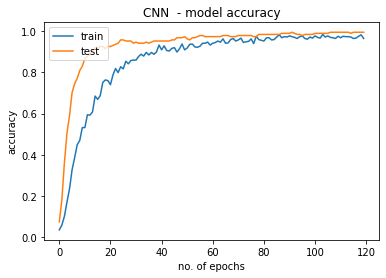

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN  - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

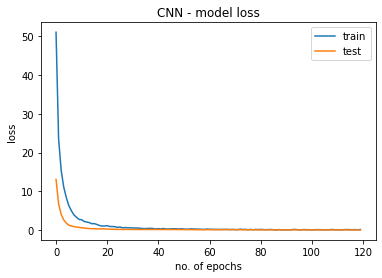

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN - model loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###After training our accuracy is nearly 99% as seen above on test set.

##Predicting classes on the test data

In [ ]:
predicted_classes = Hybrid_Model.predict((X_test,X_test,X_test,X_test)) #predict the classes on the test set
classes_x=np.argmax(predicted_classes,axis=1) #max output neuron --> respective class

In [ ]:
correct_classified_indices = np.nonzero(classes_x == y_test)[0] #compare with correct labels
incorrect_classified_indices = np.nonzero(classes_x != y_test)[0] #compare with incorrect labels

####We will see the claases which are correctly and and incorrectly classified

In [ ]:
correct_classified_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
incorrect_classified_indices

array([9])

#To integrate above into a workable attendance system using google sheets
### Here we have created a google spreadsheet with the names of the 50 students and their attendance for the day which gets automatically marked by the below snippets converting into a full-fleged model





In [ ]:
pip install gspread==4.0.0 #to mark the attendance in google sheets

  Attempting uninstall: gspread
    Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
attend = [] #class number list for atttendance
for i in range(len(classes_x)):
  if classes_x[i] == y_test[i]: #correctly classified are marked
    attend.append(classes_x[i])

p_list = []
[p_list.append(x) for x in attend if x not in p_list] #remove duplicates

for i in range(len(p_list)):
  p_list[i] += 1 #index + 1 for sheets

#printing the people who are present(their class number)
print(p_list)

[16, 29, 42, 33, 38, 3, 27, 39, 20, 41, 28, 40, 10, 31, 32, 45, 24, 18, 26, 25, 44, 9, 13, 43, 23, 14, 21, 30, 50, 48, 15, 17, 47, 36, 37, 8, 2, 4, 11, 7, 49, 34, 1, 5, 6, 12, 35, 22, 46]


In [ ]:
pip install gspread_formatting

In [ ]:
import gspread
from gspread_formatting import *

gc = gspread.service_account(filename='/content/drive/MyDrive/Colab Notebooks/Final-Folder/credentials.json') #load credentials
sh = gc.open_by_key('1dMZPunwMGShaGjN0wUXqe4Qq0jbuE1M4EkbLRXlbHKQ') #load API key
worksheet = sh.sheet1 #name of the sheet

res = worksheet.get_all_values() #fetch all data from spreadsheet

# Present List
#p_list = [1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,50] #students that are present(labels)

t_list = [False]*51 #present column

for i in p_list: #mark the attendance in array
    t_list[i]=True

fmt = cellFormat(                                                               
    backgroundColor=color(1, 1, 0),
    textFormat=textFormat(bold=False, foregroundColor=color(0, 0, 0)),
    horizontalAlignment='CENTER'
    )

for i in range (1,51):
    cell_range='A'+str(i+1)+':C'+str(i+1) #cell range to mark
    if t_list[i]:
        worksheet.update_cell(i+1,3,'Present') #mark present
    else:
        format_cell_range(worksheet, cell_range, fmt)
        worksheet.update_cell(i+1,3,'Absent') #mark absent

In [ ]:
#spreadsheet reset code for any correction or to mark a new day's attendance

fmt_refresh = cellFormat(
    backgroundColor=color(1, 1, 1),
    textFormat=textFormat(bold=False, foregroundColor=color(0, 0, 0)),
    horizontalAlignment='CENTER'
    )

for i in range (1,51):
    cell_range='A'+str(i+1)+':C'+str(i+1)                       
    format_cell_range(worksheet, cell_range, fmt_refresh)      
   # worksheet.update_cell(i+1,3,'--')